In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import re

#Worldcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Potly to dash dashboard
import plotly.express as px

In [5]:
%matplotlib inline

**Business context**

Electric networks failures in Urabá, region of Antioquia department in Colombia.

**Import data**

In [6]:
%%time
df = pd.read_excel('Original_Data/Reporte Uraba2019_CAGMV1Est.xlsx')

CPU times: user 24.6 s, sys: 134 ms, total: 24.7 s
Wall time: 25.6 s


In [7]:
df.shape

(49494, 35)

In [7]:
pd.set_option('display.max_columns', None)
display(df.dtypes)

CallID                         object
NumberOT                        int64
TaskNumber                      int64
Status                         object
ServiceType                    object
id                             object
Eng_Type                       object
RepairDate             datetime64[ns]
FinalRepairDate        datetime64[ns]
DuratioMin                      int64
TaskType                       object
CompletionDate         datetime64[ns]
OpenDate               datetime64[ns]
EarlyStart             datetime64[ns]
DueDate                datetime64[ns]
DispatchDate           datetime64[ns]
TravelDate             datetime64[ns]
OnSiteDate             datetime64[ns]
Region                         object
District                       object
TreeServiceGroup               object
ServiceGroup                   object
BusinessLine                   object
town                           object
Latitude                        int64
Longitude                       int64
Priority    

In [6]:
###getting the number of rows with repeated 
display(df.CallID.value_counts().value_counts())
len(df.CallID.unique())

1      18390
2       4488
3       1592
4       1017
5        541
6        408
7        184
8        112
9         73
10        67
12        29
15        28
13        22
11        20
14        11
20        10
21         9
17         9
16         9
24         8
18         8
22         7
30         6
23         6
25         5
40         5
19         5
42         5
26         4
35         4
47         3
31         2
41         2
27         2
28         2
33         2
29         2
116        1
39         1
50         1
45         1
55         1
Name: CallID, dtype: int64

27102

In [7]:
df.head()

CallID  NumberOT  TaskNumber     Status  \
0        M_EPM_EN_3974557   3294596           1  Realizada   
1        M_EPM_EN_3974642   3294347           1  Realizada   
2        M_EPM_EN_3974707   3294568           2  Realizada   
3  MX_EPM_0133_DE_2037523   2037523           1  Realizada   
4        M_EPM_EN_3974852   3294520           1  Realizada   

                         ServiceType       id                  Eng_Type  \
0                      Daños Energía  E_D0239  CU-TyD-Moto_MttoDaños_X1   
1                      Daños Energía  E_D0264  CU-TyD-Moto_MttoDaños_X1   
2                      Daños Energía  E_D0223  CU-TyD-Moto_MttoDaños_X1   
3  Mto. Ener. Actividades Forestales  E_MP219       CU-TyD-Moto_Poda_X2   
4                      Daños Energía  E_D0270  CU-TyD-Moto_MttoDaños_X1   

           RepairDate     FinalRepairDate  DuratioMin        TaskType  \
0 2019-12-31 19:24:00 2019-12-31 19:30:00          30  TRABAJOFUSIBLE   
1 2019-12-31 17:59:00 2019-12-31 18:23:00          30       INSPECQOS   
2 2019-12-31 17:57:00 2019-12-31 17:59:00          30       INSPECQOS   
3                 NaT                 NaT         600       PODARED01   
4 2019-12-31 16:52:00 2019-12-31 17:07:00          30  TRABAJOFUSIBLE   

       CompletionDate            OpenDate          EarlyStart  \
0 2019-12-31 19:53:55 2019-12-31 19:16:00 2019-12-31 19:16:00   
1 2019-12-31 18:42:16 2019-12-31 10:23:53 2019-12-31 10:23:00   
2 2019-12-31 18:16:57 2019-12-31 17:46:00 2019-12-31 17:46:00   
3 2019-12-31 18:10:00 2019-12-10 08:40:00 2019-12-27 07:00:00   
4 2019-12-31 18:02:33 2019-12-31 15:38:00 2019-12-31 15:38:00   

              DueDate        DispatchDate          TravelDate  \
0 2019-12-31 20:00:00 2019-12-31 19:17:00 2019-12-31 19:17:00   
1 2019-12-31 18:23:00 2019-12-31 11:07:00 2019-12-31 17:46:12   
2 2020-01-03 17:37:00 2019-12-31 17:48:00 2019-12-31 17:54:36   
3 2019-12-27 17:00:00 2019-12-30 14:55:00 2019-12-31 07:11:00   
4 2019-12-31 23:36:00 2019-12-31 15:40:00 2019-12-31 15:47:37   

           OnSiteDate Region      District          TreeServiceGroup  \
0 2019-12-31 19:24:06  Uraba  Apartado TyD  AP_TyD Atención Clientes   
1 2019-12-31 17:52:35  Uraba     Turbo TyD  TU_TyD Atención Clientes   
2 2019-12-31 17:55:35  Uraba     Turbo TyD  TU_TyD Atención Clientes   
3 2019-12-31 07:18:00  Uraba     Turbo TyD      TU_TyD Mantenimiento   
4 2019-12-31 16:48:53  Uraba     Turbo TyD  TU_TyD Atención Clientes   

            ServiceGroup       BusinessLine                town  Latitude  \
0  TyD Atención Clientes          Daños TyD              Carepa   7771097   
1  TyD Atención Clientes          Daños TyD               Turbo   8108337   
2  TyD Atención Clientes          Daños TyD             Necoclí   8466042   
3      TyD Mantenimiento  Mantenimiento TyD             Necoclí   8420147   
4  TyD Atención Clientes          Daños TyD  San pedro de urabá   8418435   

   Longitude  Priority IncompleteReason  \
0  -76809294         1              NaN   
1  -76732551         4              NaN   
2  -76598210         4              NaN   
3  -76646490         7              NaN   
4  -76304074         1              NaN   

                                 CrewGeneralComments  \
0  Se realizo reposición de fusible en el fr 4159...   
1  Se llega a el cirio y se encuentra que el daño...   
2  Se realizó inspección encontrándose poste a pu...   
3  corregimiento pueblo nuevo \nvereda  comarca  ...   
4  Se repuso 1 fusible de 6T al F47910 el servici...   

                                          RepairCode       W6Key    IdEPM  \
0  CAMBIAR O INSTALAR FUSIBLE AISLADERO RAMAL - R...  1527996425  1460157   
1                  REVISIÓN POR CALIDAD DEL SERVICIO  1527808009  1459416   
2          CAMBIAR/ASEGURAR POSTE PRIMARIO - Ramales  1527955467  1460101   
3                                                NaN  1517256747  1419179   
4  CAMBIAR O INSTALAR FUSIBLE AISLADERO RAMAL - R...  1527922700  1460058   

  LocationID       

¿Qué es cada observación?

No hay llave primaria

Varias filas hacen referencia a una misma intervención, pero en la cual se hicieron varios trabajos, uno por fila.

In [8]:
df.duplicated().value_counts()

False    49494
dtype: int64

**Missingness plot**

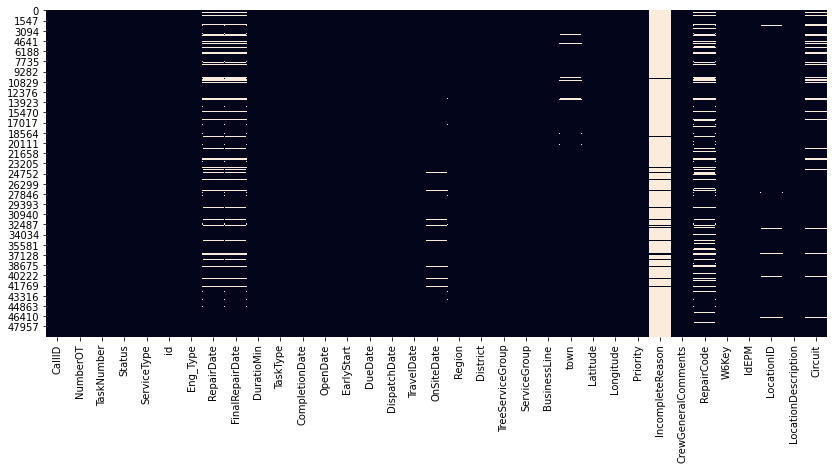

In [9]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False)

**Brief summary of categorical variables**

In [10]:
print('--- Service type ---')
display(df.ServiceType.value_counts())
print('Not null values:',df.ServiceType.isnull().value_counts()[0])

print('\n --- Status ---')
display(df.Status.value_counts())
print('Not null values:',df.Status.isnull().value_counts()[0])

print('\n --- Eng. type ---')
display(df.Eng_Type.value_counts())
print('Not null values:',df.Eng_Type.isnull().value_counts()[0])

print('\n --- Region (Of Antioquia department) ---')
display(df.Region.value_counts())
print('Not null values:',df.Region.isnull().value_counts()[0])

print('\n --- Town (Of Antioquia department) ---')
display(df.town.value_counts())
print('Not null values:',df.town.isnull().value_counts()[0])

print('\n --- Priority ---')
display(df.Priority.value_counts())
print('Not null values:',df.Priority.isnull().value_counts()[0])

print('\n --- TaskNumber (What is it?) ---')
display(df.TaskNumber.value_counts())
print('Not null values:',df.TaskNumber.isnull().value_counts()[0])

print('\n --- LocationDescription ---')
display(df.LocationDescription.value_counts())
print('Not null values:',df.LocationDescription.isnull().value_counts()[0])



--- Service type ---


Daños Energía                        33224
Mantenimiento Energía                14321
Mto. Ener. Actividades Forestales     1695
Mantenimiento Línea Viva               240
Mantenimiento Subterránea               14
Name: ServiceType, dtype: int64

Not null values: 49494

 --- Status ---


Realizada       46545
No Realizada     2949
Name: Status, dtype: int64

Not null values: 49494

 --- Eng. type ---


CU-TyD-Moto_MttoDaños_X1                 36549
CU-TyD-Camioneta_Mtto_X3                  3795
CU-TyD-Camioneta_Mtto_X4                  2581
CU-TyD-Moto_Poda_X2                       2409
CU-TyD-Camioneta_Poda_X4                  1380
CU-TyD-Camion_Mtto_X4                     1348
CU-TyD-Camioneta_MttoDaños Prepago_x2      524
CU-TyD-Moto_MttoDaños Prepago_X1           266
CU-TyD-Canasta Tipo II                     262
CU-TyD-Camioneta_Mtto_EquiEsp_Calidad      190
CU-TyD-Moto_Calidad_Geo                    169
CU-TyD-Camioneta_SubterraneaX3               9
CU-TyD-Canasta Tipo I                        8
CU-TyD-Moto_MttoDaños_X2                     2
CU-TyD-Camioneta_SubterraneaX4               2
Name: Eng_Type, dtype: int64

Not null values: 49494

 --- Region (Of Antioquia department) ---


Uraba    49494
Name: Region, dtype: int64

Not null values: 49494

 --- Town (Of Antioquia department) ---


Turbo                        10911
Necoclí                       6914
Apartadó                      6271
Carepa                        4556
San pedro de urabá            4459
Chigorodó                     4018
Arboletes                     2748
San juan de urabá             2356
Mutatá                        1927
Currulao                      1535
Nueva Colonia                 1334
Belen de Bajira                858
La Atoyosa                     658
Medellín                        24
San Pedro De Los Milagros       19
Nechí                           17
Riosucio                         9
Anzá                             6
San José De La Montaña           5
Caucasia                         5
Olaya                            3
El Carmen De Viboral             2
Carolina                         2
Anorí                            2
Nariño                           2
Segovia                          2
La estrella                      2
Murindó                          2
San Jerónimo        

Not null values: 48656

 --- Priority ---


9    12395
1    11889
4    10843
3     6214
2     5958
7     2116
5       79
Name: Priority, dtype: int64

Not null values: 49494

 --- TaskNumber (What is it?) ---


1      31161
2       9166
3       3032
4       1093
5        570
       ...  
205        1
141        1
132        1
124        1
300        1
Name: TaskNumber, Length: 166, dtype: int64

Not null values: 49494

 --- LocationDescription ---


Transformador                     34751
Salida Circuito                    6331
Aisladero                          2522
Reconectador                        696
Salida_Circuito                     636
                                  ...  
CIRCUITO 403-16 TRAMO C4207           1
CIRCUITO 403-14 TRAMO C41194          1
CIRCUITO 409-12 NODO 928329           1
CIRCUITO 401-15 TRAMO C41081          1
CIRCUITO 415-12 SEGMENTO R1273        1
Name: LocationDescription, Length: 887, dtype: int64

Not null values: 49494


In [11]:
print('--- TaskType ---')
display(df.TaskType.value_counts())

print('--- Reason of no actions---')
display(df.IncompleteReason.value_counts())

print('--- Repair Code ---')
display(df.RepairCode.value_counts())

print('--- Crew General comments ---')
#display(df.CrewGeneralComments.unique())
#This have different case


--- TaskType ---


TRABAJOFUSIBLE           13090
EVENTOPROGRAM            12414
ATEMEDATC                 7957
TRABACOMSECUN             3743
INSPECQOS                 3066
INSPECSEGURIDAD           3023
PODARED01                 1299
TRABPUENTECONEX           1152
OPEMNBNOPROG               558
INSPRECORRIDORA            497
MTTOELEMREDAEREA           471
PODARED                    409
PODARED02PLANES            394
MTTORECONEAEREA            341
REPOFUSRA                  146
INSRETPTRA                 114
REALMTOEQUISECCLV           95
TRABAJOPOSTE                80
MTTOPTRA                    72
TRABSECCIOLV                55
INSRETPOSTERA               45
MTTOCUCHILLARA              45
ATEMEDATCPRE                40
INSRETELEAEREA              40
TRABAJOLINPRIMLV            38
INSRETCABRAPRIM             33
INSANTESCALINFRAELE         32
RETIROBJRED                 26
OPERMNBPROG                 24
TRASVESPOSTELV              23
AISLADA                     17
VERESTOPERRED               15
TRABAJOV

--- Reason of no actions---


TyD_594_Fuerza Mayor                                      898
TyD_626_Cancelado por el despacho                         598
TyD_624_Servicio Normal                                   347
TyD_622_Por recursos                                      340
TyD_406_Problemas de orden público                        147
TyD_595_Requiere otro tipo de cuadrilla                   137
TyD_607_Pedido duplicado para el mismo producto           122
TyD_623_Informacion errada o incompleta                   107
TyD_619_Actividad para otras dependencias                  88
TyD_596_Sin acceso a la instalación                        74
TyD_600_El cliente o solicitante pide anular solicitud     34
TyD_598_Vía cerrada                                        17
TyD_625_Falta Material                                     12
TyD_597_Usuario no permitió realizar la labor              10
TyD_612_Localizado en área con restricción ambiental       10
TyD_601_Requiere cambio de producto                         5
TyD_618_

--- Repair Code ---


ASEGURAR/REPARAR ACOMETIDAS DOMICILIARIAS                       5230
REVISIÓN POR CALIDAD DEL SERVICIO                               4106
CAMBIAR O INSTALAR FUSIBLE AISLADERO RAMAL - Ramales            3765
CAMBIAR FUSIBLE A TRANSFORMADOR - Transformador                 3078
CAMBIAR/INSTALAR CONECTOR EN LA RED SECUNDARIA                  2115
                                                                ... 
REALIZAR PODA CON CANASTA DE LINEA VIVA                            1
ALEJAR LINEA PRIMARIA AEREA AISLADA                                1
REPONER LINEA PRIMARIA AEREA AISLADA - Alimentador principal       1
CAMBIO RED DESNUDA A CABLE CUBIERTO                                1
CAMBIAR O INSTALAR PARARRAYO PRIMARIO - Salida de Circuito         1
Name: RepairCode, Length: 117, dtype: int64

--- Crew General comments ---


##### Status consistence

In [12]:
display(pd.crosstab(df.Status,~df.IncompleteReason.isnull()))
display(pd.crosstab(df.Status,~df.RepairCode.isnull()))

IncompleteReason  False  True 
Status                        
No Realizada          5   2944
Realizada         46534     11

RepairCode    False  True 
Status                    
No Realizada   2728    221
Realizada      6181  40364

In [13]:
#Status "No Realizada" pero sin Incomplete Reason
df[(df.Status=='No Realizada') & (df.IncompleteReason.isnull()==True)]

CallID  NumberOT  TaskNumber        Status  \
16392  M_EPM_EN_3840683   3184324           2  No Realizada   
39402  M_EPM_EN_3649022   3027633           2  No Realizada   
39403  M_EPM_EN_3649022   3027633           2  No Realizada   
39404  M_EPM_EN_3649022   3027633           2  No Realizada   
39523  M_EPM_EN_3652922   3028347           2  No Realizada   

                 ServiceType       id                  Eng_Type  \
16392          Daños Energía  E_D0272  CU-TyD-Moto_MttoDaños_X1   
39402  Mantenimiento Energía  E_MO211  CU-TyD-Camioneta_Mtto_X4   
39403  Mantenimiento Energía  E_MO211  CU-TyD-Camioneta_Mtto_X4   
39404  Mantenimiento Energía  E_MO211  CU-TyD-Camioneta_Mtto_X4   
39523  Mantenimiento Energía  E_MO284  CU-TyD-Camioneta_Mtto_X3   

               RepairDate     FinalRepairDate  DuratioMin        TaskType  \
16392 2019-09-05 19:55:00                 NaT          30  TRABAJOFUSIBLE   
39402 2019-04-02 09:52:00 2019-04-02 15:08:00         240   EVENTOPROGRAM   
39403 2019-04-02 09:52:00 2019-04-02 15:08:00         240   EVENTOPROGRAM   
39404 2019-04-02 09:52:00 2019-04-02 15:08:00         240   EVENTOPROGRAM   
39523 2019-04-02 08:05:00 2019-04-02 13:34:00         240   EVENTOPROGRAM   

           CompletionDate            OpenDate          EarlyStart  \
16392 2019-09-05 16:10:00 2019-09-05 12:02:00 2019-09-05 15:00:00   
39402 2019-04-02 20:09:00 2019-04-01 15:23:00 2019-04-01 15:23:00   
39403 2019-04-02 20:09:00 2019-04-01 15:23:00 2019-04-01 15:23:00   
39404 2019-04-02 20:09:00 2019-04-01 15:23:00 2019-04-01 15:23:00   
39523 2019-04-02 12:39:00 2019-04-02 07:42:54 2019-04-02 07:42:00   

                  DueDate        DispatchDate          TravelDate  \
16392 2019-09-05 18:00:00 2019-09-05 16:08:00 2019-09-05 16:09:00   
39402 2019-04-08 15:23:00 2019-04-01 17:04:00 2019-04-02 07:02:00   
39403 2019-04-08 15:23:00 2019-04-01 17:04:00 2019-04-02 07:02:00   
39404 2019-04-08 15:23:00 2019-04-01 17:04:00 2019-04-02 07:02:00   
39523 2019-04-09 07:41:00 2019-04-02 07:44:00 2019-04-02 08:04:00   

               OnSiteDate Region      District          TreeServiceGroup  \
16392                 NaT  Uraba     Turbo TyD  TU_TyD Atención Clientes   
39402 2019-04-02 08:26:00  Uraba     Turbo TyD      TU_TyD Mantenimiento   
39403 2019-04-02 08:26:00  Uraba     Turbo TyD      TU_TyD Mantenimiento   
39404 2019-04-02 08:26:00  Uraba     Turbo TyD      TU_TyD Mantenimiento   
39523 2019-04-02 08:05:00  Uraba  Apartado TyD      AP_TyD Mantenimiento   

                ServiceGroup       BusinessLine       town  Latitude  \
16392  TyD Atención Clientes          Daños TyD      Turbo   8091575   
39402      TyD Mantenimiento  Mantenimiento TyD      Turbo   8083515   
39403      TyD Mantenimiento  Mantenimiento TyD      Turbo   8083515   
39404      TyD Mantenimiento  Mantenimiento TyD      Turbo   8083515   
39523      TyD Mantenimiento  Mantenimiento TyD  Chigorodó   7667163   

       Longitude  Priority IncompleteReason  \
16392  -76728368         2              NaN   
39402  -76705996         9              NaN   
39403  -76705996         9              NaN   
39404  -76705996         9              NaN   
39523  -76680770         9              NaN   

                                     CrewGeneralComments  \
16392  Este evento lo atendió la cuadrilla de ROR, au...   
39402  Se le dio cumplimiento ala STP205450 se repuso...   
39403  Se le dio cumplimiento ala STP205450 se repuso...   
39404  Se le dio cumplimiento ala STP205450 se repuso...   
39523  Se e cancela este evento para activar otro de ...   

                                          RepairCode       W6Key    IdEPM  \
16392              REVISIÓN POR CALIDAD DEL SERVICIO  1467990054  1169953   
39402  REPARAR Y/O REPONER DESCARGA A TIERRA-Ramales  1387757768   764588   
39403      CAMBIAR AISLADORES (COPA-PLATO) - Ramales  1387757768   764588   
39404              REPONER NEUTRO PRIMARIO - Ramales  1387757768   764588   
39523              REPA

In [14]:
#Status "Realizada" pero con Incomplete Reason
df[(df.Status=='Realizada') & (df.IncompleteReason.isnull()==False)]

CallID  NumberOT  TaskNumber     Status  \
10944  MX_EPM_0133_DE_1803448   1803448           1  Realizada   
15010        M_EPM_EN_3852029   3192889           1  Realizada   
15011        M_EPM_EN_3852029   3192889           1  Realizada   
15012        M_EPM_EN_3852029   3192889           1  Realizada   
15606        M_EPM_EN_3847481   3189458           1  Realizada   
20001        M_EPM_EN_3810150   3159541           1  Realizada   
22821        M_EPM_EN_3787762   3142285           2  Realizada   
27195        M_EPM_EN_3754897   3114185           1  Realizada   
37909        M_EPM_EN_3668275   3039682           1  Realizada   
38996        M_EPM_EN_3658003   3031893           6  Realizada   
48784        M_EPM_EN_3574785   2952492           1  Realizada   

                 ServiceType       id                  Eng_Type  \
10944  Mantenimiento Energía  E_D0238  CU-TyD-Moto_MttoDaños_X1   
15010          Daños Energía  E_D0222  CU-TyD-Moto_MttoDaños_X1   
15011          Daños Energía  E_D0222  CU-TyD-Moto_MttoDaños_X1   
15012          Daños Energía  E_D0222  CU-TyD-Moto_MttoDaños_X1   
15606          Daños Energía  E_D0216  CU-TyD-Moto_MttoDaños_X1   
20001          Daños Energía  E_D0227  CU-TyD-Moto_MttoDaños_X1   
22821          Daños Energía  E_D0273  CU-TyD-Moto_MttoDaños_X1   
27195          Daños Energía  E_D0289  CU-TyD-Moto_MttoDaños_X1   
37909          Daños Energía  E_D0414  CU-TyD-Moto_MttoDaños_X1   
38996  Mantenimiento Energía  E_D0270  CU-TyD-Moto_MttoDaños_X1   
48784          Daños Energía  E_D0200  CU-TyD-Moto_MttoDaños_X1   

               RepairDate     FinalRepairDate  DuratioMin         TaskType  \
10944                 NaT                 NaT          15   MTTOCUCHILLARA   
15010 2019-09-13 11:32:00 2019-09-13 15:10:00          30  INSPECSEGURIDAD   
15011 2019-09-13 11:32:00 2019-09-13 15:10:00          30  INSPECSEGURIDAD   
15012 2019-09-13 11:32:00 2019-09-13 15:10:00          30  INSPECSEGURIDAD   
15606 2019-09-10 15:00:00 2019-09-10 15:09:00          30   TRABAJOFUSIBLE   
20001 2019-08-12 11:12:00 2019-08-12 12:54:00          30        INSPECQOS   
22821 2019-07-24 14:50:00 2019-07-24 14:52:00          45        ATEMEDATC   
27195 2019-06-28 07:17:00 2019-06-28 07:19:00          30   TRABAJOFUSIBLE   
37909 2019-04-13 14:33:00 2019-04-13 14:35:00          45        ATEMEDATC   
38996 2019-04-05 11:22:00 2019-04-05 11:24:00         240    EVENTOPROGRAM   
48784 2019-01-09 15:29:00 2019-01-09 15:37:00          45        ATEMEDATC   

           CompletionDate            OpenDate          EarlyStart  \
10944 2019-10-16 08:06:53 2019-10-13 12:41:00 2019-10-15 15:45:00   
15010 2019-09-13 16:50:33 2019-09-13 10:05:00 2019-09-13 10:05:00   
15011 2019-09-13 16:50:33 2019-09-13 10:05:00 2019-09-13 10:05:00   
15012 2019-09-13 16:50:33 2019-09-13 10:05:00 2019-09-13 10:05:00   
15606 2019-09-10 15:09:45 2019-09-10 11:26:26 2019-09-10 11:26:00   
20001 2019-08-12 13:02:44 2019-08-12 06:43:22 2019-08-12 06:43:00   
22821 2019-07-24 15:18:00 2019-07-24 12:54:00 2019-07-24 12:54:00   
27195 2019-06-28 07:23:49 2019-06-26 19:31:25 2019-06-26 19:31:00   
37909 2019-04-13 14:37:09 2019-04-12 09:44:19 2019-04-12 09:44:00   
38996 2019-04-05 11:25:13 2019-04-05 08:03:22 2019-04-05 08:03:00   
48784 2019-01-09 15:39:49 2019-01-08 12:50:00 2019-01-08 12:50:00   

                  DueDate        DispatchDate          TravelDate  \
10944 2019-10-15 16:00:00 2019-10-16 03:03:00 2019-10-16 08:01:45   
15010 2019-09-14 10:05:00 2019-09-13 10:06:00 2019-09-13 10:15:30   
15011 2019-09-14 10:05:00 2019-09-13 10:06:00 2019-09-13 10:15:30   
15012 2019-09-14 10:05:00 2019-09-13 10:06:00 2019-09-13 10:15:30   
15606 2019-09-10 17:06:00 2019-09-10 14:17:00 2019-09-10 14:57:12   
20001 2019-08-15 06:42:00 2019-08-12 06:49:00 2019-08-12 10:22:16   
22821 2019-07-26 12:53:00 2019-07-24 12:55:00 2019-07-24 12:56:00   
27195 2019-06-27 03:22:00 2019-06-28 00:34:00 2019-06-28 07:12:58   
37909 2019-04-13 09:40:00 2019-04-12 2

In [15]:
#Status "No Realizada" pero con código de reparación
df[(df.Status=='No Realizada') & (df.RepairCode.isnull()==False)]

CallID  NumberOT  TaskNumber        Status  \
45     M_EPM_EN_3974464   3294169           1  No Realizada   
52     M_EPM_EN_3973973   3293677           1  No Realizada   
53     M_EPM_EN_3973973   3293677           1  No Realizada   
55     M_EPM_EN_3973508   3293266           1  No Realizada   
117    M_EPM_EN_3973865   3293868           2  No Realizada   
...                 ...       ...         ...           ...   
48387  M_EPM_EN_3578760   2956036           1  No Realizada   
48600  M_EPM_EN_3577582   2954978           1  No Realizada   
48672  M_EPM_EN_3577061   2954510           1  No Realizada   
48957  M_EPM_EN_3571708   2950000           1  No Realizada   
49178  M_EPM_EN_3571635   2949926           1  No Realizada   

                 ServiceType       id                  Eng_Type  \
45             Daños Energía  E_D0220  CU-TyD-Moto_MttoDaños_X1   
52             Daños Energía  E_D0246  CU-TyD-Moto_MttoDaños_X1   
53             Daños Energía  E_D0246  CU-TyD-Moto_MttoDaños_X1   
55             Daños Energía  E_D0215  CU-TyD-Moto_MttoDaños_X1   
117            Daños Energía  E_D0215  CU-TyD-Moto_MttoDaños_X1   
...                      ...      ...                       ...   
48387          Daños Energía  E_D0203  CU-TyD-Moto_MttoDaños_X1   
48600  Mantenimiento Energía  E_MO419  CU-TyD-Camioneta_Mtto_X3   
48672          Daños Energía  E_D0252  CU-TyD-Moto_MttoDaños_X1   
48957          Daños Energía  E_D0252  CU-TyD-Moto_MttoDaños_X1   
49178          Daños Energía  E_D0252  CU-TyD-Moto_MttoDaños_X1   

               RepairDate     FinalRepairDate  DuratioMin         TaskType  \
45    2019-12-31 15:19:00 2019-12-31 15:20:00          30  INSPECSEGURIDAD   
52    2019-12-31 14:38:00 2019-12-31 14:55:00          30  INSPECSEGURIDAD   
53    2019-12-31 14:38:00 2019-12-31 14:55:00          30  INSPECSEGURIDAD   
55    2019-12-31 14:05:00 2019-12-31 14:37:00          45        ATEMEDATC   
117   2019-12-31 08:27:00 2019-12-31 08:42:00          30  INSPECSEGURIDAD   
...                   ...                 ...         ...              ...   
48387 2019-01-13 13:47:00 2019-01-13 13:55:00          45        ATEMEDATC   
48600 2019-01-11 08:35:00 2019-01-11 08:42:00         240    EVENTOPROGRAM   
48672 2019-01-10 15:14:00 2019-01-10 15:15:00          30   TRABAJOFUSIBLE   
48957 2019-01-08 07:37:00 2019-01-08 07:38:00          45        ATEMEDATC   
49178 2019-01-04 16:02:00 2019-01-04 16:03:00          30   TRABAJOFUSIBLE   

           CompletionDate            OpenDate          EarlyStart  \
45    2019-12-31 15:22:06 2019-12-31 08:08:41 2019-12-31 08:08:00   
52    2019-12-31 14:56:33 2019-12-30 15:41:36 2019-12-30 15:41:00   
53    2019-12-31 14:56:33 2019-12-30 15:41:36 2019-12-30 15:41:00   
55    2019-12-31 14:55:08 2019-12-30 08:57:11 2019-12-30 08:57:00   
117   2019-12-31 08:45:51 2019-12-30 21:04:00 2019-12-30 21:04:00   
...                   ...                 ...                 ...   
48387 2019-01-13 14:04:08 2019-01-12 16:53:41 2019-01-12 16:53:00   
48600 2019-01-11 08:47:00 2019-01-11 07:44:37 2019-01-11 07:44:00   
48672 2019-01-10 15:32:00 2019-01-10 13:44:11 2019-01-10 13:44:00   
48957 2019-01-08 08:25:00 2019-01-04 13:23:00 2019-01-04 13:23:00   
49178 2019-01-04 16:06:00 2019-01-04 11:40:42 2019-01-04 11:40:00   

                  DueDate        DispatchDate          TravelDate  \
45    2020-01-01 08:08:00 2019-12-31 08:09:00 2019-12-31 15:17:21   
52    2019-12-31 15:41:00 2019-12-31 07:15:00 2019-12-31 13:58:49   
53    2019-12-31 15:41:00 2019-12-31 07:15:00 2019-12-31 13:58:49   
55    2020-01-01 08:56:00 2019-12-31 08:26:00 2019-12-31 13:22:55   
117   2019-12-31 05:02:00 2019-12-30 21:06:00 2019-12-31 08:03:32   
...                   ...                 ...                 ...   
48387 2019-01-13 08:53:00 2019-01-13 09:27:00 2019-01-13 13:33:49   
48600 2019-01-18 07:43:00 2019-01-11 07:59:00 2019-01-11 08:01:00   
48672 2019-01-11 01:43:00 2019-01-10 13:46:00 2019-01-10 15:32:00   

In [16]:
#Status "Realizada" pero no tiene código de reparación
df[(df.Status=='Realizada') & (df.RepairCode.isnull()==True)].head(20)

CallID  NumberOT  TaskNumber     Status  \
3    MX_EPM_0133_DE_2037523   2037523           1  Realizada   
5    MX_EPM_0133_DE_1977183   1977183           1  Realizada   
8    MX_EPM_0133_DE_2140074   2140074           1  Realizada   
10   MX_EPM_0133_DE_2064785   2064785           1  Realizada   
13   MX_EPM_0133_DE_2139883   2139883           1  Realizada   
29   MX_EPM_0133_DE_1825148   1825152          40  Realizada   
31   MX_EPM_0133_DE_1665625   1665625          15  Realizada   
32   MX_EPM_0133_DE_2014382   2014382           1  Realizada   
33   MX_EPM_0133_DE_2137352   2137352           1  Realizada   
34   MX_EPM_0133_DE_2037136   2037180          80  Realizada   
35   MX_EPM_0133_DE_1825148   1825148          10  Realizada   
38   MX_EPM_0133_DE_2036285   2036304         100  Realizada   
59   MX_EPM_0133_DE_2143993   2143993           1  Realizada   
61   MX_EPM_0133_DE_2143992   2143992           1  Realizada   
78         M_EPM_EN_3974467   3294186           1  Realizada   
138  MX_EPM_0133_DE_2128505   2128505           1  Realizada   
141  MX_EPM_0133_DE_2139857   2139857           1  Realizada   
146  MX_EPM_0133_DE_2139964   2139964           1  Realizada   
147  MX_EPM_0133_DE_1453651   1453651           1  Realizada   
148  MX_EPM_0133_DE_2122728   2122728           1  Realizada   

                           ServiceType       id                  Eng_Type  \
3    Mto. Ener. Actividades Forestales  E_MP219       CU-TyD-Moto_Poda_X2   
5    Mto. Ener. Actividades Forestales  E_MP421       CU-TyD-Moto_Poda_X2   
8    Mto. Ener. Actividades Forestales  E_MP291       CU-TyD-Moto_Poda_X2   
10   Mto. Ener. Actividades Forestales  E_MP241       CU-TyD-Moto_Poda_X2   
13               Mantenimiento Energía  E_M0450   CU-TyD-Moto_Calidad_Geo   
29   Mto. Ener. Actividades Forestales  E_MP429       CU-TyD-Moto_Poda_X2   
31   Mto. Ener. Actividades Forestales  E_MP427  CU-TyD-Camioneta_Poda_X4   
32   Mto. Ener. Actividades Forestales  E_MP288  CU-TyD-Camioneta_Poda_X4   
33               Mantenimiento Energía  E_M0455   CU-TyD-Moto_Calidad_Geo   
34   Mto. Ener. Actividades Forestales  E_MP263       CU-TyD-Moto_Poda_X2   
35   Mto. Ener. Actividades Forestales  E_MP424       CU-TyD-Moto_Poda_X2   
38   Mto. Ener. Actividades Forestales  E_MP430       CU-TyD-Moto_Poda_X2   
59               Mantenimiento Energía  E_D0414  CU-TyD-Moto_MttoDaños_X1   
61               Mantenimiento Energía  E_D0297  CU-TyD-Moto_MttoDaños_X1   
78               Mantenimiento Energía  E_D0216  CU-TyD-Moto_MttoDaños_X1   
138              Mantenimiento Energía  E_M0402  CU-TyD-Camioneta_Mtto_X4   
141              Mantenimiento Energía  E_M0450   CU-TyD-Moto_Calidad_Geo   
146              Mantenimiento Energía  E_D0414  CU-TyD-Moto_MttoDaños_X1   
147                      Daños Energía  E_D0216  CU-TyD-Moto_MttoDaños_X1   
148              Mantenimiento Energía  E_M0451  CU-TyD-Camioneta_Mtto_X3   

             RepairDate     FinalRepairDate  DuratioMin         TaskType  \
3                   NaT                 NaT         600        PODARED01   
5                   NaT                 NaT         600        PODARED01   
8                   NaT                 NaT         540        PODARED01   
10                  NaT                 NaT         600        PODARED01   
13                  NaT                 NaT         540  INSPRECORRIDORA   
29                  NaT                 NaT         600        PODARED01   
31                  NaT                 NaT         540        PODARED01   
32                  NaT                 NaT         540        PODARED01   
33                  NaT                 NaT         600        REPOFUSRA   
34                  NaT                 NaT         600        PODARED01   
35                  NaT                 NaT         600        PODARED01   
38                  NaT                 NaT         600        PODARED01   
59                  NaT                 NaT         240  INSPRECORRIDO

In [17]:
len(df[(df.Status=='Realizada') & (df.RepairCode.isnull()==True)]['CallID'].unique())

3823

Status "Realizada" pero no tiene código de reparación. 134 filas correspondientes a 124 llamadas.

Se alcanzan a ver las siguientes situaciones: 
1. Se da como realizado pero queda pendiente trabajo.
2. Casos en que no hubo que realizar trabajo por normalidad en servicio o ya se había realizado el trabajo.
3. Se describe el trabajo realizado pero no se reporta el RepairCode correspondiente.

La variable de texto ``CrewGeneralComments`` es la que tiene información de cual es la falla.

**Repairs duration in minutes**

count    49494.000000
mean       121.611347
std        195.565289
min         15.000000
25%         30.000000
50%         40.000000
75%        240.000000
max      13200.000000
Name: DuratioMin, dtype: float64

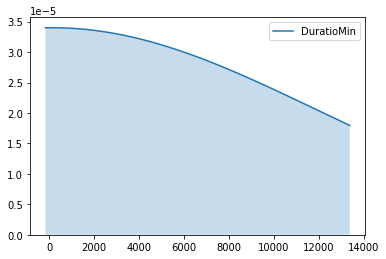

In [18]:
display(df.DuratioMin.describe())
sns.kdeplot(df.DuratioMin, shade=True, bw=60)

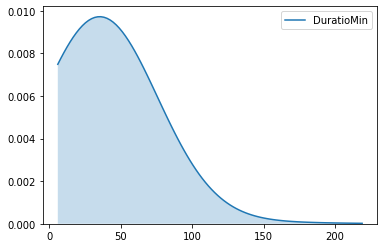

In [19]:
sns.kdeplot(df.DuratioMin[df.DuratioMin < 240], shade=True, bw=3)

**Latitude and Longitude**

In [20]:
df[['Latitude','Longitude']].head()

Latitude  Longitude
0   7771097  -76809294
1   8108337  -76732551
2   8466042  -76598210
3   8420147  -76646490
4   8418435  -76304074

Problem with the magnitude

In [21]:
df.Latitude = df.Latitude/1000000
df.Longitude = df.Longitude/1000000

In [22]:
df[['Latitude','Longitude']].describe()

Latitude     Longitude
count  49494.000000  49494.000000
mean       8.095747    -76.616564
std        0.379059      0.124578
min        7.198807    -76.967032
25%        7.850866    -76.713752
50%        8.082400    -76.644949
75%        8.411899    -76.549474
max        8.871278    -76.181859

**Failure Calls across time**

Text(0, 0.5, 'Number of calls')

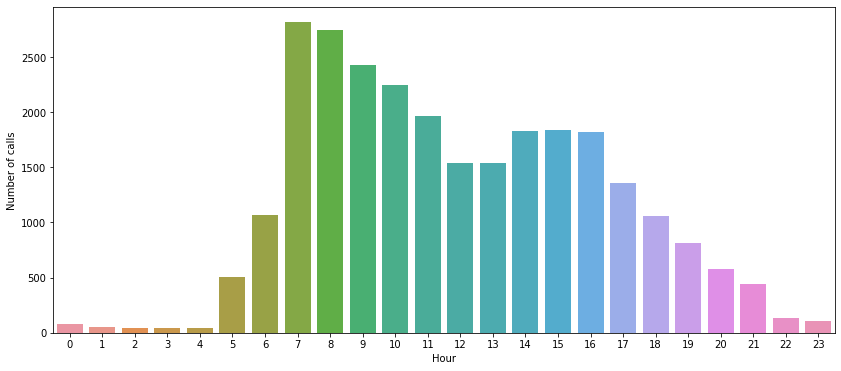

In [23]:
plt.figure(figsize=(14,6))
sns.barplot('index','OpenDate', 
            data = df[~df.CallID.duplicated()].OpenDate.dt.hour.value_counts().reset_index().sort_values('index'))
plt.xlabel('Hour')
plt.ylabel('Number of calls')

Text(0, 0.5, 'Number of Calls')

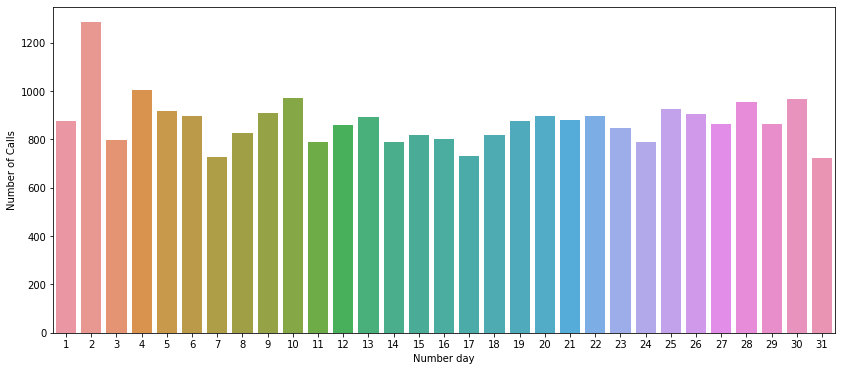

In [24]:
plt.figure(figsize=(14,6))
sns.barplot('index','OpenDate', 
            data = df[~df.CallID.duplicated()].OpenDate.dt.day.value_counts().reset_index().sort_values('index'))
plt.xlabel('Number day')
plt.ylabel('Number of Calls')


Text(0, 0.5, 'Number of Calls')

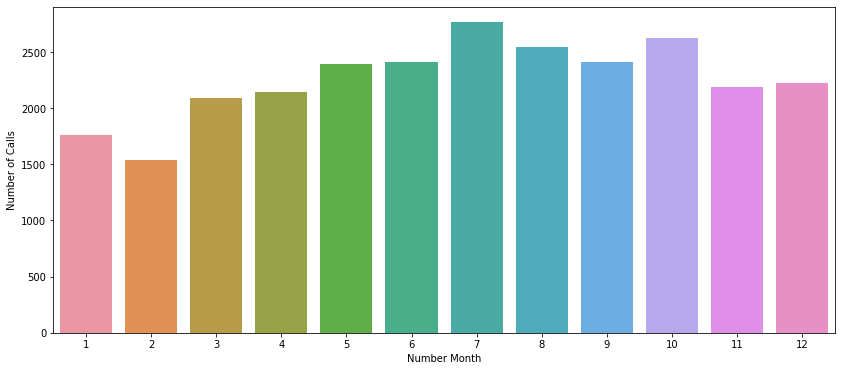

In [25]:
plt.figure(figsize=(14,6))
sns.barplot('index','OpenDate', 
            data = df[~df.CallID.duplicated()].OpenDate.dt.month.value_counts().reset_index().sort_values('index'))
plt.xlabel('Number Month')
plt.ylabel('Number of Calls')



In [26]:
df[~df.CallID.duplicated()].OpenDate.dt.to_period('M').value_counts().reset_index().sort_values('index')

index  OpenDate
14  2018-06         1
13  2018-08         1
12  2018-12        20
10  2019-01      1763
11  2019-02      1542
9   2019-03      2087
8   2019-04      2145
5   2019-05      2395
4   2019-06      2406
0   2019-07      2766
2   2019-08      2545
3   2019-09      2411
1   2019-10      2627
7   2019-11      2188
6   2019-12      2205

Text(0, 0.5, 'Number of Calls')

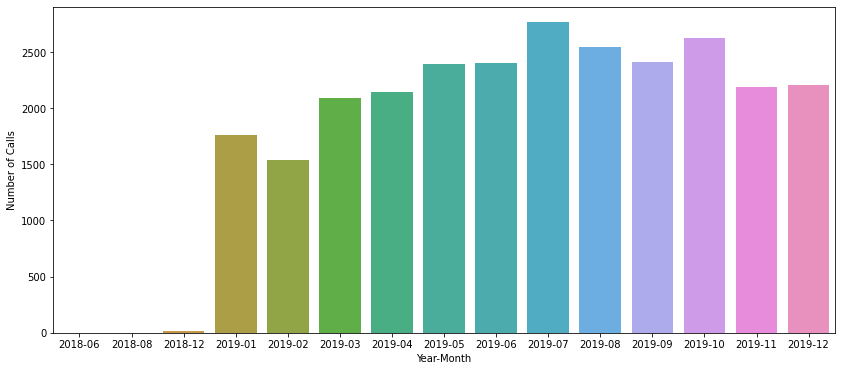

In [27]:
plt.figure(figsize=(14,6))
sns.barplot('index','OpenDate', 
            data = df[~df.CallID.duplicated()].OpenDate.dt.to_period('M').value_counts().reset_index().sort_values('index'))
plt.xlabel('Year-Month')
plt.ylabel('Number of Calls')


In [28]:
display(df[~df.CallID.duplicated()].OpenDate.dt.weekday.value_counts().reset_index().sort_values('index'))
df[~df.CallID.duplicated()].OpenDate.dt.day_name().value_counts().reset_index().sort_values('index')

index  OpenDate
0      0      4895
1      1      4602
2      2      4461
3      3      4274
4      4      4066
5      5      2641
6      6      2163

index  OpenDate
4     Friday      4066
0     Monday      4895
5   Saturday      2641
6     Sunday      2163
3   Thursday      4274
1    Tuesday      4602
2  Wednesday      4461

In [29]:
print('First date: ', df.OpenDate.min())
print('Last date: ', df.OpenDate.max())

First date:  2018-06-21 06:13:33
Last date:  2019-12-31 19:16:00


**FILTRAR SOLO POR OBSERVACIONES DE 2019**

#### LocationDescription -> LocationResume

In [30]:
df.LocationDescription.value_counts().head(10)

Transformador                      34751
Salida Circuito                     6331
Aisladero                           2522
Reconectador                         696
Salida_Circuito                      636
CIRCUITO 412-14 SEGMENTO FR4112      125
CIRCUITO 415-12 TRAMO 415-12          95
CIRCUITO 403-16 TRAMO 403-16          82
CIRCUITO 411-13 SEGMENTO FR426        68
CIRCUITO 410-11 TRAMO 410-11          66
Name: LocationDescription, dtype: int64

In [31]:
df.LocationDescription.unique()

array(['Aisladero', 'Salida Circuito', 'Transformador',
       'CIRCUITO 415-12 SEGMENTO R1269', 'CIRCUITO 411-11 TRAMO 411-11',
       'CIRCUITO 414-11 SEGMENTO FR495', 'CIRCUITO 412-11 TRAMO 412-11',
       'CIRCUITO 411-13 SEGMENTO R1299', 'CIRCUITO 403-16 TRAMO 403-16',
       'CIRCUITO 410-11', 'CIRCUITO 403-14 TRAMO 403-14',
       'CIRCUITO 407-11 SEGMENTO R2683', 'CIRCUITO 407-41 TRAMO 407-41',
       'CIRCUITO 401-16 TRAMO C41174', 'CIRCUITO 412-41 TRAMO 412-41',
       'Reconectador', 'CIRCUITO 403-16 TRAMO R887',
       'CIRCUITO 415-11 NODO 830605', 'CIRCUITO 411-13 TRAMO 411-13',
       'CIRCUITO 404-11 NODO 495253', 'CIRCUITO 404-11 NODO 495215',
       'CIRCUITO 401-11 ALIMENTADOR PRINCIPAL 401-11',
       'CIRCUITO 411-13 NODO 922276', 'CIRCUITO 403-16 TRAMO C4379',
       'CIRCUITO 415-11 NODO 488114', 'CIRCUITO 411-43',
       'CIRCUITO 404-11 TRAMO 404-11', 'CIRCUITO 411-11 TRAMO C442',
       'CIRCUITO 411-13 NODO 418175', 'CIRCUITO 411-13 SEGMENTO F4474',
       'C

In [32]:
location_d = df.LocationDescription.str.upper()
# To add Alimentador principal
location_d[location_d.str.contains('ALIMENTADOR PRINCIPAL')] = 'ALIMENTADOR PRINCIPAL'
# To unify Salida circuito
location_d[location_d=='SALIDA_CIRCUITO'] = 'SALIDA CIRCUITO'
# To add Ramal
location_d[(location_d.str.contains('RAMAL')) | (location_d.str.contains('RAMALES'))] = 'RAMAL'
# To add Tramo
location_d[location_d.str.contains('TRAMO')] = 'TRAMO'
# To add Segmento
location_d[location_d.str.contains('SEGMENTO')] = 'SEGMENTO'
# To add Nodo
location_d[location_d.str.contains('NODO')] = 'NODO'
# Plural Transformador
location_d[location_d.str.contains('TRANSFORMADORES')] = 'TRANSFORMADOR'


location_d.value_counts().head(10)

TRANSFORMADOR            34752
SALIDA CIRCUITO           6967
AISLADERO                 2522
SEGMENTO                  1524
TRAMO                     1262
RECONECTADOR               696
ALIMENTADOR PRINCIPAL      256
NODO                       254
CIRCUITO 401-11             66
CIRCUITO 409-12             59
Name: LocationDescription, dtype: int64

In [33]:
location_d[~location_d.isin(
                ['TRANSFORMADOR', 'SALIDA CIRCUITO', 'AISLADERO', 
                 'SEGMENTO', 'TRAMO', 'RECONECTADOR', 'ALIMENTADOR PRINCIPAL',
                 'NODO', 'RAMAL'] ) ].unique()

array(['CIRCUITO 410-11', 'CIRCUITO 411-43', 'CIRCUITO 404-12',
       'CIRCUITO 405-13', 'CIRCUITO 409-12', 'CIRCUITO 415-11',
       'CIRCUITO 406-11', '401-11', '400367', 'CIRCUITO 411-13',
       'REGION URABA', 'CIRCUITO 414-11', '426332', '901521', '415-13',
       'CIRCUITO 407-13', 'CIRCUITO 415-13', 'CIRCUITO 401-11',
       'CIRCUITO 401-42', '915029', '414-12', '411-11', '912325',
       'CIRCUITO 403-16', '918925', 'CIRCUITO 412-12', '452223',
       'CIRCUITO 401-15', 'CIRCUITO 405-11', '426307', 'F41290', '415-12',
       '400041', '400539', '409-12', '407-12', '402-15', '414-11',
       '407-11', 'CIRCUITO 402-16', 'CIRCUITO 412-13', 'CIRCUITO 412-14',
       'CIRCUITO 404-11', 'CIRCUITO 411-11', 'CIRCUITO 401-41', 'F41556',
       'F41257', '402-13', 'FR4322', '915441', 'CIRCUITO 411-41',
       'CIRCUITO 414-12', '818510', '465027', 'SWITCH', 'CIRCUITO 411-42',
       '827755', '903670', 'CIRCUITO 411-12', 'CIRCUITO 415-12',
       'CIRCUITO 411-44', 'CIRCUITO 407-41',

In [34]:
location_d[~location_d.isin(
                ['TRANSFORMADOR', 'SALIDA CIRCUITO', 'AISLADERO', 
                 'SEGMENTO', 'TRAMO', 'RECONECTADOR', 'ALIMENTADOR PRINCIPAL',
                 'NODO', 'RAMAL'] ) ] = 'NO ESPECIFICADO'


In [35]:
# New variable
df['LocationResume'] = location_d
del(location_d)

In [36]:
df.LocationResume.value_counts()

TRANSFORMADOR            34752
SALIDA CIRCUITO           6967
AISLADERO                 2522
SEGMENTO                  1524
TRAMO                     1262
NO ESPECIFICADO           1228
RECONECTADOR               696
ALIMENTADOR PRINCIPAL      256
NODO                       254
RAMAL                       33
Name: LocationResume, dtype: int64

Text(0.5, 1.0, 'Time of repair')

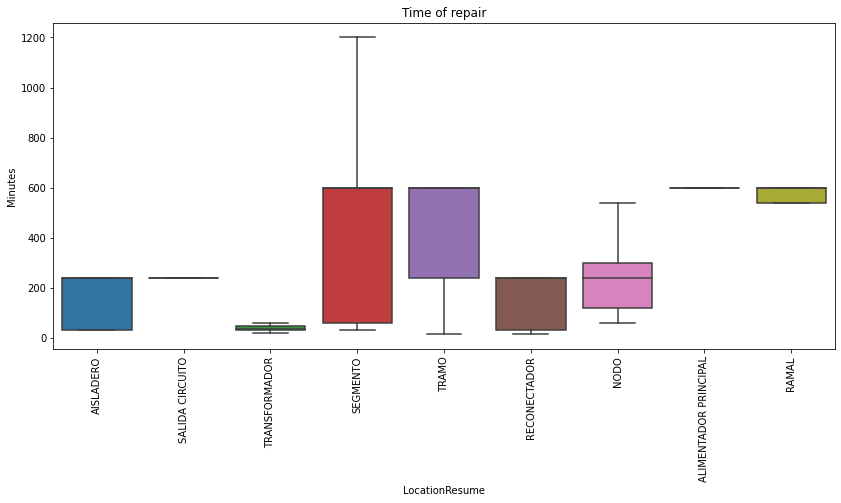

In [37]:
plt.figure(figsize=(14,6))
sns.boxplot('LocationResume','DuratioMin', data=df[df.LocationResume!='NO ESPECIFICADO'],
            showfliers=False)
plt.xticks(rotation=90)
plt.ylabel('Minutes')
plt.title('Time of repair')

#### Circuit revision

In [38]:
df.Circuit.value_counts()
df.Circuit.isnull().value_counts()

False    44938
True      4556
Name: Circuit, dtype: int64

In [39]:
df[df.Circuit.isnull()][['LocationID','LocationDescription','Circuit']]

LocationID             LocationDescription Circuit
3          R1269  CIRCUITO 415-12 SEGMENTO R1269     NaN
5         411-11    CIRCUITO 411-11 TRAMO 411-11     NaN
8          FR495  CIRCUITO 414-11 SEGMENTO FR495     NaN
10        412-11    CIRCUITO 412-11 TRAMO 412-11     NaN
13         R1299  CIRCUITO 411-13 SEGMENTO R1299     NaN
...          ...                             ...     ...
48089     934067     CIRCUITO 411-13 NODO 934067     NaN
48123        NaN                           FR476     NaN
48145        NaN                           FR476     NaN
48271        NaN                          404-12     NaN
49459        NaN                          F43732     NaN

[4556 rows x 3 columns]

In [40]:
# Some missings can be fill with a pattern "ddd-dd" in LocationDescription

df.Circuit = df.Circuit.fillna(df.LocationDescription.apply(lambda x: re.findall(r'\d\d\d-\d\d', x)[0] 
                                     if len(re.findall(r'\d\d\d-\d\d', x)) > 0 
                                     else 'NO ESPECIFICADO' ))
df.Circuit.isnull().value_counts()

False    49494
Name: Circuit, dtype: int64

In [41]:
(df.Circuit=='NO ESPECIFICADO').value_counts()

False    49255
True       239
Name: Circuit, dtype: int64

In [42]:
df[df.LocationResume=='TRANSFORMADOR'][['LocationID','LocationDescription','Circuit']]

LocationID LocationDescription Circuit
2         489023       Transformador  415-12
4         478088       Transformador  407-12
6         492051       Transformador  415-13
7         492042       Transformador  415-13
9         828025       Transformador  402-14
...          ...                 ...     ...
49488      64835       Transformador  401-16
49489     905933       Transformador  412-13
49490     482044       Transformador  409-11
49491     482044       Transformador  409-11
49492     482044       Transformador  409-11

[34752 rows x 3 columns]

#### Crew general comments

In [43]:
#To lowercase
df.CrewGeneralComments = df.CrewGeneralComments.str.lower()

In [44]:
print('Unique values:',len(df.CrewGeneralComments.unique()))
print('Duplicates Crew General Comments:', df.CrewGeneralComments.duplicated().value_counts()[1])

print('\n --- Head ---')
print(df.CrewGeneralComments.value_counts().head())
print('\n --- Tail ---')
print(df.CrewGeneralComments.value_counts().tail())

Unique values: 37867
Duplicates Crew General Comments: 11627

 --- Head ---
se desbloquea medidor prepago quedó él servicio normal                                                                                                                                                                                                                                                                                                                                                                                21
duplicada                                                                                                                                                                                                                                                                                                                                                                                                                             21
se repara linea secundaria rota no se afecta el transformador queda usuari

In [45]:
df[df.CrewGeneralComments.duplicated()].CrewGeneralComments

16       se instaló 500 mt de triples 1/0 para remplaza...
17       se instaló 500 mt de triples 1/0 para remplaza...
18       se instaló 500 mt de triples 1/0 para remplaza...
21       se retiro 200 metros de ascr # 2 y se instalar...
22       se retiro 200 metros de ascr # 2 y se instalar...
                               ...                        
49476             se reparo cable de señal servicio normal
49481    circuito 415-11. se instalaron conectores en r...
49484    se yego al sitio y se encontró vivienda  con o...
49491    se yego al sitio y se encontró trasformador de...
49492    se yego al sitio y se encontró trasformador de...
Name: CrewGeneralComments, Length: 11627, dtype: object

Find Key Words in "Comments"

In [46]:
#find frequency of words in CrewGeneralComments and print important ones, excluiding articles or prepositions

palabrasx=['se','de','y','Se','el','en','la','con','a','por','no','SE','que','las','al','para','del','DE','queda','Y','le','los','un','ya','2','esta','sin']
guardar = pd.DataFrame(columns=['palabras','row'])  

for row in range(0,999):
       if not (pd.isnull(df['CrewGeneralComments'][row])):
                data_set = df['CrewGeneralComments'][row]
                split_it = data_set.split() 
                splitDF = pd.DataFrame(split_it,columns=['palabras'])
                splitDF["row"]=row
                guardar= pd.concat([guardar, splitDF])
print(guardar.shape)
guardarb=guardar[guardar['palabras'].isin(palabrasx)==False]
print(guardarb.shape)

(29658, 2)
(18929, 2)


In [47]:
aa=guardarb.groupby("palabras")["palabras"].count()
aa.sort_values(ascending=False).head(50)

palabras
servicio         668
fusible          300
medidor          254
normal           235
trafo            212
usuario          202
verifica         182
encontró         149
encuentra        148
cambio           144
cambia           139
ruta             124
energía          118
prepago          114
usuarios         112
poste            112
normal.          107
transformador     99
apoyo             98
normalizado       95
secundaria        92
linea             85
evento            83
f                 82
quemado           82
circuito          82
pendiente         80
acometida         79
repara            77
red               77
lluvias           74
este              71
quedó             71
fuertes           67
alas              66
sector            66
lo                65
cliente           64
energizó          62
revisa            62
reparo            61
fue               61
teclado           58
cambió            58
primaria          58
realizaron        58
#                 57
sobr

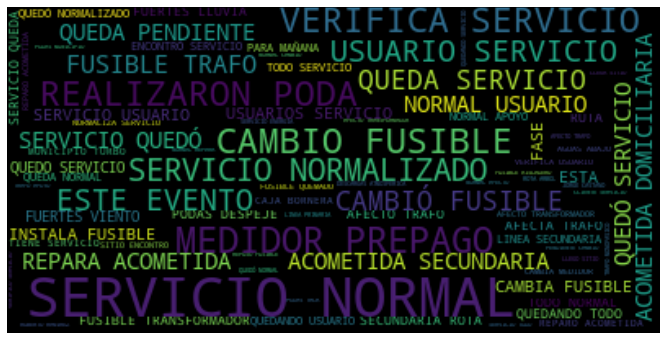

In [48]:
df["CrewGeneralCommentsString"] = df["CrewGeneralComments"].str.upper().astype(str)
df.head()

text = (" ".join(list(df["CrewGeneralCommentsString"].unique()))).replace('/',' ')
#text

palabrasx2 = ['RAMAL RAMALES', 'PARA']
# Create and generate a word cloud image:
wordcloud_CGC = WordCloud(min_word_length=4,collocations=True, relative_scaling=0.5,
                        stopwords=palabrasx2).generate(text)

# Display the generated image:
plt.figure(figsize=(14,6))
plt.imshow(wordcloud_CGC, interpolation='bilinear')
plt.axis("off")
plt.show()


In [49]:
#Remove accendts functions
def remove_accents(s):
    replace = [
        ['á','a'], ['é','e'], ['í','i'], ['ó','o'], ['ú','u']
    ]
    for a, b in replace:
        s = s.str.replace(a,b).str.replace(a.upper(),b.upper())
    return s


**Service type and priority**

In [15]:
num_repar_ot=df["NumberOT"].value_counts().reset_index() #Number of reprisons OT

#g = sns.catplot(y="NumberOT",
#                data=num_repar_ot, kind="violin")
#g.set(xlabel='', ylabel='# of reparations per WO')
#plt.title("Distribution of number of reparisons per WO") #Plotting the distribution
#plt.savefig('Outputs/plots/violin.png', dpi=300, bbox_inches='tight')

fig = px.box(num_repar_ot, y="NumberOT",notched=True, title="Box plot of Number of reparations per Work order")
fig.show()


display(num_repar_ot["NumberOT"].describe(percentiles=[.25, .5, .75, 0.76, 0.77]).reset_index()) #descriptives statistics of number of reparisons


analysis1="""
The most of Work orders has just one reparison (76 %)
"""
print(analysis1)

display(num_repar_ot["NumberOT"].value_counts().reset_index())

num_calls_ot_pri=df[["CallID", "NumberOT","Priority"]].groupby(["NumberOT","Priority"]).count().reset_index()

display(num_calls_ot_pri[["CallID","Priority"]].groupby(["Priority"]).sum().reset_index())

analysis2="""
There is not  a clear relationship between the priority and the number of reparisons
"""
print(analysis2)


#h = sns.catplot(x="Priority", y="CallID",
#                data=num_calls_ot_pri, kind="violin")
#h.set(xlabel='', ylabel='# of reparations per WO')
#plt.title("Distribution of number of reparisons per WO by priority")
#plt.savefig('Outputs/plots/violin2.png', dpi=300, bbox_inches='tight')

fig1 = px.box(num_calls_ot_pri, x="Priority", y="CallID",notched=True, title="Box plot of Number of reparations per Work order")
fig1.show()


analysis3="""
In general. there is not difference in the number of reparisons by priority of the failures and order,
one call for work order, but for priority nine, we could see more work orders with two or three calls.
"""
print(analysis3)



index      NumberOT
0  count  38602.000000
1   mean      1.282162
2    std      0.740049
3    min      1.000000
4    25%      1.000000
5    50%      1.000000
6    75%      1.000000
7    76%      1.000000
8    77%      1.000000
9    max     15.000000


The most of Work orders has just one reparison (76 %)



index  NumberOT
0       1     31587
1       2      4689
2       3      1418
3       4       547
4       5       217
5       6        75
6       7        39
7       8        16
8       9         6
9      11         3
10     15         1
11     14         1
12     13         1
13     12         1
14     10         1

Priority  CallID
0         1   11889
1         2    5958
2         3    6214
3         4   10843
4         5      79
5         7    2116
6         9   12395


There is not  a clear relationship between the priority and the number of reparisons




In general. there is not difference in the number of reparisons by priority of the failures and order,
one call for work order, but for priority nine, we could see more work orders with two or three calls.



index  ServiceType
0                      Daños Energía        33224
1              Mantenimiento Energía        14321
2  Mto. Ener. Actividades Forestales         1695
3           Mantenimiento Línea Viva          240
4          Mantenimiento Subterránea           14

Priority                               1     2     3      4   5     7      9
ServiceType                                                                 
Daños Energía                      11872  5803  4657  10843  26    23      0
Mantenimiento Energía                 16   129   525      0  37  1219  12395
Mantenimiento Línea Viva               0    23     0      0  13   204      0
Mantenimiento Subterránea              1     1     0      0   0    12      0
Mto. Ener. Actividades Forestales      0     2  1032      0   3   658      0


It seems that cases with lesser priority are solved with maintenance activities,
that could explain why cases with priority nine have more number of calls



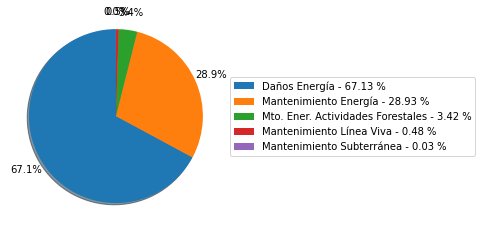

In [52]:
num_service_type=df["ServiceType"].value_counts().reset_index()
display(num_service_type)

num_service_type["Percentage"] = num_service_type["ServiceType"]/num_service_type["ServiceType"].sum()
labelst = ['{} - {:.2f} %'.format(num_service_type['index'][i],num_service_type["Percentage"][i]*100)
           for i in range(len(num_service_type))]
ss=plt.pie(num_service_type["ServiceType"],shadow=True, startangle=90, 
           autopct='%1.1f%%', pctdistance = 1.2)
plt.legend(labels=labelst, loc='center left', bbox_to_anchor=(1, 0.5))


display(pd.crosstab(df.ServiceType,df.Priority))

analysis4="""
It seems that cases with lesser priority are solved with maintenance activities,
that could explain why cases with priority nine have more number of calls
"""
print(analysis4)




In [53]:
fig = px.pie(num_service_type, values='ServiceType', names='index', title='Service Type Distribution')
fig.show()

**Location of failures by priority**

In [ ]:
#priority_col_dict
#Mejorar los colores, función para cada RGB
df.Priority.unique()
priority_colors = ['#%02x%02x%02x' % (255, 0+(i*30), 0) for i in range(len(df.Priority.unique()))]
priority_colors = list(reversed(priority_colors))
priority_col_dict = dict(zip(df.Priority.unique(),priority_colors[-1::-1]))

#Center in Apartadó, Antioquia: (7.88299, -76.62587)
antioquia_map2 = folium.Map(location=[7.88299, -76.62587],
                        zoom_start=9,
                        tiles="OpenStreetMap")

for i in range(0,len(df)):
    marker = folium.CircleMarker(location=[ df["Latitude"][i], df["Longitude"][i] ],
                                 radius=2,
                                 color= priority_col_dict[df.Priority[i]],
                                 fill=True)
    marker.add_to(antioquia_map2)


antioquia_map2